# Sympy

Here is the use of the sympy libraries in the derivation of a complicate function

In [1]:
#import libraries
import numpy

from sympy import *
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

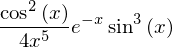

In [3]:
#sympy solution
init_printing()

x=symbols('x') #We create the sympy symbol 'x'
y=cos(x)**2*sin(x)**3/(4*x**5*exp(x)) #we use it to create a formula
y #printing y

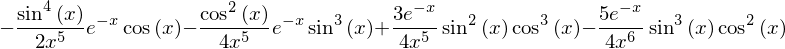

In [5]:
yprime=diff(y) #we take the derivative of the previous function
yprime #we display it

In [6]:
yprime_lamb = lambdify((x), yprime) #we lambdify yprime so we can evaluate it
yprime_lamb(2.2) #we evaluate it and print it

This answer is the one researched

# Traffic equation

preliminary note. The assessment ask us to work with a 11km road. This lead to the fact that the "bump" in the car's density leave the road pretty fast. This make the discussion more difficult. We have decided to work here with a longer road even if we have answer the question on the website with a 11km road. (Note that we still work with a constant dx step).

## Deriving the traffic equation

The whole simulation is defined by the equation of the $$V(\rho) = V_{max} (1-\frac{\rho}{\rho_max})$$
The rest simply follows from the the non-linear convection equation.
Asymptotically this link between velocity and density is look coherent even if it's just an approximation.

## Stability of the simulation

In this forward-time, backward-space simulation, we must verify that the CFL coefficient are smaller than one. In this simulation the convection speed is variable but bounded. By taking the maximal velocity, whe can check that :
$$\frac{V_{max} \Delta t}{\Delta x} = \frac{(80or135) 0.001}{11/51} = 0.37 or 0.63$$

This should ensure stability of the solution.

In [7]:
#Traffic equation solution
#rho0 intial condition of the densitiy on the road
#Vmax, maximal speed
#rhomax, maximal density
#T, Final time of the simulation
#dt Step in time
#dx Step in space
#rhoi rho(0, t)

def TrafEqSol(rho0, Vmax, rhomax, T, dt, dx, rhoi):
    #copying initial conditions
    u=rho0.copy()

    #solve numerically the equation
    for n in range (int(T/dt)):
        un= u.copy()
        u[1:]=un[1:]- dt/dx*Vmax*(1- 2*un[1:]/rhomax)*(un[1:]-un[0:-1])
        u[0] = rhoi
    return u

#Numerical function for homework
#Find the biggest element of a table
def findMax(u):
    mx = u[0]
    for i in range (0, len(u)-1):
        if mx<u[i]:
            mx = u[i]
    return mx
            

#finding of a table
def findAve(u):
    sumT = 0
    for i in range(0, len(u)-1):
        sumT = sumT + u[i]
    return sumT/(len(u)-1)
    
#sum a table 
def sumTable(u):
    sumT = 0
    for i in range(0, len(u)-1):
        sumT = sumT + u[i]
    return sumT

## Evaluation of the functions 

In [8]:
#Common intial condition in the homeworkUnits are km and hours
L = 20
rhomax=250
nx = int(L/11*51)
dt = 0.001

### Part A

Simulation with maximal speed 80km/h. rho(0,t) = 10. With the initial density as defined in the assignement. Solution will be calculated at times 0, 3 and 6 minutes.

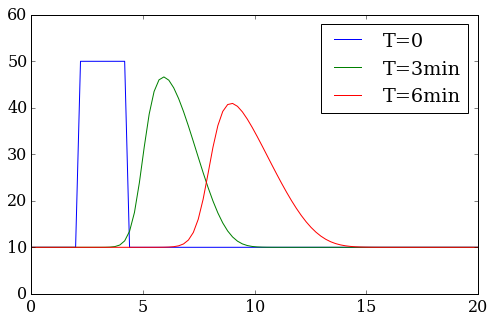

In [10]:
#Initial conditions (Used in part A of the assignement)
Vmax = 80
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*10 
rho0[10:20] = 50
rhoi=10
dx=L/nx

#calculating solutions
u1=TrafEqSol(rho0, Vmax, rhomax, 0, dt, dx, rhoi)
u2=TrafEqSol(rho0, Vmax, rhomax, 0.05, dt, dx, rhoi)
u3=TrafEqSol(rho0, Vmax, rhomax, 0.1, dt, dx, rhoi)

        
#Let's plot the solution because we like graphs
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x,u1, label='T=0')
pyplot.plot(x,u2, label='T=3min')
pyplot.plot(x,u3, label='T=6min')
pyplot.xlim([0,20])
pyplot.ylim([0,60])
pyplot.legend();

The plot of the solution is the one we would have expected. The car are dispersing along the road. We would like to ensure that the  total number of car is constant as long as "the bump" in the density don't reach the end of the road. Let's check it at time t=3min :


In [11]:
nb_car_1 = sumTable(u1)
nb_car_2 = sumTable(u2)
nb_car_3 = sumTable(u3)
print(nb_car_1, nb_car_2, nb_car_3)

1310.0 1352.98469996 1369.90548438


The number of car is mostly conserved event though some have appeared. We have linked that to the imprecision ineherent in numerical methods. Indeed, if we do the analytical calculation of 
$$\partial_t\int\rho dx = - \int \partial_t\rho dx = - \int \partial_\rho F * \partial_x \rho * dx = [F]_{x_0}^{x_f}$$
Thus the total number of car should be constant if the flux of car going in and out is the same.
The equation we have seems indeed to be consistent with the observation we can make in everyday live in first approximation.

Let's now find the value asked in the assignement :

In [12]:
#finding the smallest speed at time T = 0 (wich correspond to the highest density)
rho_max_1 = findMax(u1)#finding the highest density on the road at time T=0
V_min_1 = Vmax*(1-rho_max_1/rhomax)/3.6#printing it in m/s

#finding average speed at time t = 3min
V=numpy.zeros(nx) #creating a table st
V[:]=Vmax*(1-u2[:]/rhomax) #converting the density table in velocity table
V_av=findAve(V)/3.6#printing it in m/s

#finding the smallest speed at time T = 6min (wich correspond to the highest density)
rho_max_3 = findMax(u3)#finding the highest density on the road at time T=6min
V_min_3 = Vmax*(1-rho_max_3/rhomax)/3.6 #printing it in m/s

print(V_min_1)
print(V_av)
print(V_min_3)

17.7777777778
20.9006254457
18.5832164545


It's seems coherent that the minimum speed increase as the cars disperse along the road

### Part B

We do the same for those new initial conditions. As you will see, the result are analoguous and don't need being mentioned.

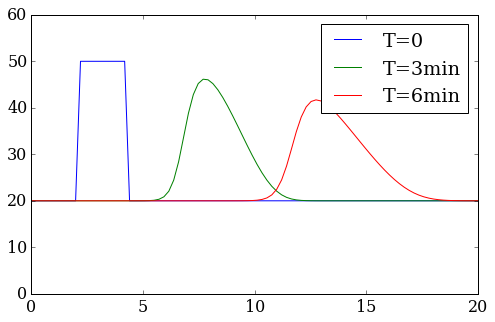

In [13]:
#Initial conditions (Used in part B of the assignement)
Vmax = 136
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*20 
rho0[10:20] = 50
rhoi=20
dx=L/nx

#calculating solutions
u1=TrafEqSol(rho0, Vmax, rhomax, 0, dt, dx, rhoi)
u2=TrafEqSol(rho0, Vmax, rhomax, 0.05, dt, dx, rhoi)
u3=TrafEqSol(rho0, Vmax, rhomax, 0.1, dt, dx, rhoi)

        
#Let's plot the solution because we like graphs
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x,u1, label='T=0')
pyplot.plot(x,u2, label='T=3min')
pyplot.plot(x,u3, label='T=6min')
pyplot.xlim([0,20])
pyplot.ylim([0,60])
pyplot.legend();

In [14]:
nb_car_1 = sumTable(u1)
nb_car_2 = sumTable(u2)
nb_car_3 = sumTable(u3)
print(nb_car_1, nb_car_2, nb_car_3)

2120.0 2156.98469375 2170.56160663


In [15]:
#finding the smallest speed at time T = 0 (wich correspond to the highest density)
rho_max_1 = findMax(u1)#finding the highest density on the road at time T=0
V_min_1 = Vmax*(1-rho_max_1/rhomax)/3.6#printing it in m/s

#finding average speed at time t = 3min
V=numpy.zeros(nx) #creating a table st
V[:]=Vmax*(1-u2[:]/rhomax) #converting the density table in velocity table
V_av=findAve(V)/3.6#printing it in m/s

#finding the smallest speed at time T = 6min (wich correspond to the highest density)
rho_max_3 = findMax(u3)#finding the highest density on the road at time T=6min
V_min_3 = Vmax*(1-rho_max_3/rhomax)/3.6 #printing it in m/s

print(V_min_1)
print(V_av)
print(V_min_3)

30.2222222222
34.1959716929
31.4754675993


### Conclusion

There is nothing new appearing in the second part. The simulation seems good even if cars are appearing (problem which could be solved by diminishing both space and time step paying attention to the CFL coefficient).